In [637]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [638]:
df = pd.read_csv('../data/arg_industrialproduction_raw.csv')
df = df.T
df

,0
Country,Argentina
Country Code,ARG
Series,"Industrial Production, constant US$, seas. adj.,,"
Series Code,IPTOTSAKD
1987 [1987],..
...,...
2020M06 [2020M06],..
2020M07 [2020M07],..
2020Q1 [2020Q1],..
2020Q2 [2020Q2],..


In [639]:
df = df.reset_index()
df

,index,0
0,Country,Argentina
1,Country Code,ARG
2,Series,"Industrial Production, constant US$, seas. adj.,,"
3,Series Code,IPTOTSAKD
4,1987 [1987],..
...,...,...
571,2020M06 [2020M06],..
572,2020M07 [2020M07],..
573,2020Q1 [2020Q1],..
574,2020Q2 [2020Q2],..


In [640]:
df = df.iloc[4:, :]
df[df == '..'] = np.nan
df.columns = ['time', 'y']
df['y'] = df['y'].astype(float)
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '..'] = np.nan
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '..'] = np.nan
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,time,y
4,1987 [1987],NaN
5,1987M01 [1987M01],NaN
6,1987M02 [1987M02],NaN
7,1987M03 [1987M03],NaN
8,1987M04 [1987M04],NaN
...,...,...
571,2020M06 [2020M06],NaN
572,2020M07 [2020M07],NaN
573,2020Q1 [2020Q1],NaN
574,2020Q2 [2020Q2],NaN


In [641]:
keep = df.time.apply(lambda x : 'M' in x)
df = df[keep]
df

,time,y
5,1987M01 [1987M01],NaN
6,1987M02 [1987M02],NaN
7,1987M03 [1987M03],NaN
8,1987M04 [1987M04],NaN
9,1987M05 [1987M05],NaN
...,...,...
568,2020M03 [2020M03],NaN
569,2020M04 [2020M04],NaN
570,2020M05 [2020M05],NaN
571,2020M06 [2020M06],NaN


In [642]:
df['time'] = df['time'].str[:7]
df.time = pd.to_datetime(df.time.str.replace('M', ''), format='%Y%m')
df = df.dropna()
df['time'] = pd.to_datetime(df.time)
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/1807043305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].str[:7]
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/1807043305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time = pd.to_datetime(df.time.str.replace('M', ''), format='%Y%m')
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/1807043305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,time,y
91,1992-02-01,5.307551e+09
92,1992-03-01,4.468763e+09
93,1992-04-01,4.861495e+09
94,1992-05-01,4.803284e+09
95,1992-06-01,4.693274e+09
...,...,...
550,2019-02-01,7.129981e+09
551,2019-03-01,6.791405e+09
552,2019-04-01,6.958646e+09
553,2019-05-01,7.006597e+09


### Aggregating to Quarterly Level

In [643]:
# aggregate at the quarterly level
df['YQ'] = pd.PeriodIndex(pd.to_datetime(df.time), freq='Q')
df = df.groupby('YQ')['y'].mean().reset_index()
df['time'] = pd.PeriodIndex(df.YQ, freq='Q').to_timestamp()
df = df.drop(columns='YQ')
df['logy'] = np.log(df['y'])
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3141309720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YQ'] = pd.PeriodIndex(pd.to_datetime(df.time), freq='Q')


,y,time,logy
0,4.888157e+09,1992-01-01,22.310081
1,4.786017e+09,1992-04-01,22.288964
2,4.951040e+09,1992-07-01,22.322864
3,5.215747e+09,1992-10-01,22.374948
4,5.031079e+09,1993-01-01,22.338900
...,...,...,...
105,7.520601e+09,2018-04-01,22.740912
106,7.250831e+09,2018-07-01,22.704382
107,6.868398e+09,2018-10-01,22.650197
108,6.950654e+09,2019-01-01,22.662102


Text(0.5, 0, 'Year')

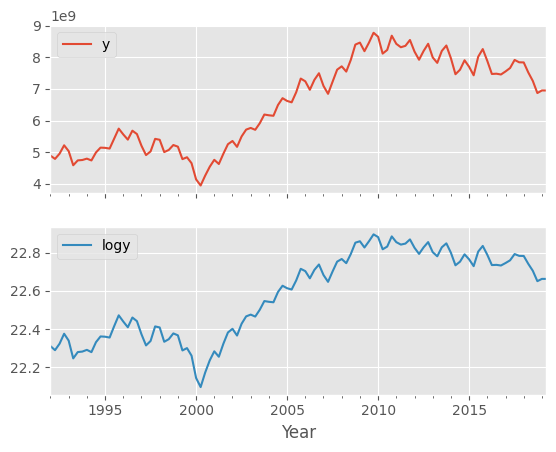

In [644]:
df.plot(x='time', subplots=True)
plt.xlabel('Year')

In [645]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df.set_index('time')['logy'], period=4, model='additive')

df['logy'] = decompose.trend.values
df['y'] = np.exp(df['logy'])
df = df.dropna()

Text(0.5, 0, 'Year')

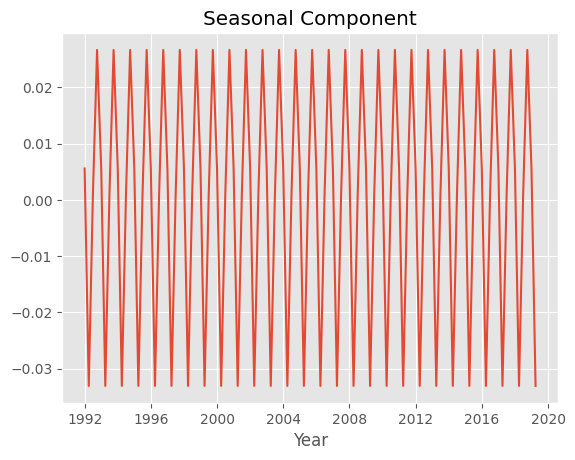

In [646]:
plt.plot(decompose.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Year')

### Deseasonalized Data

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

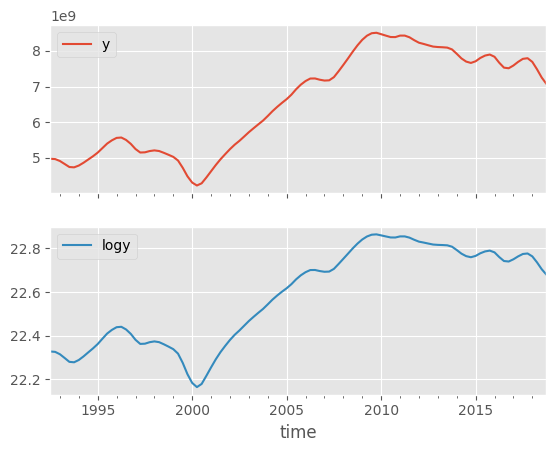

In [647]:
df.plot(x='time', subplots=True)

In [648]:
from statsmodels.tsa.filters.hp_filter import hpfilter
df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=1600)

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3332423081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=1600)
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3332423081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=1600)


<Axes: xlabel='time'>

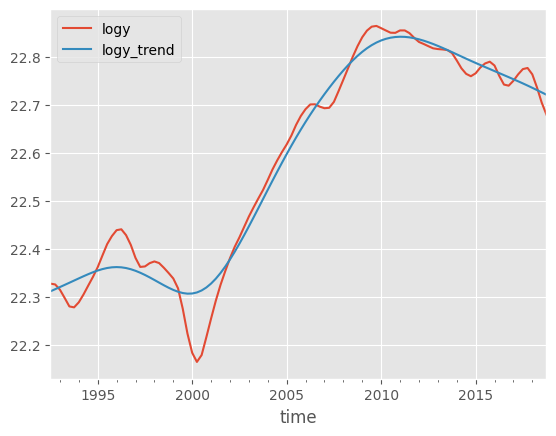

In [649]:
df[['time', 'logy', 'logy_trend']].plot(x='time')

<Axes: xlabel='time'>

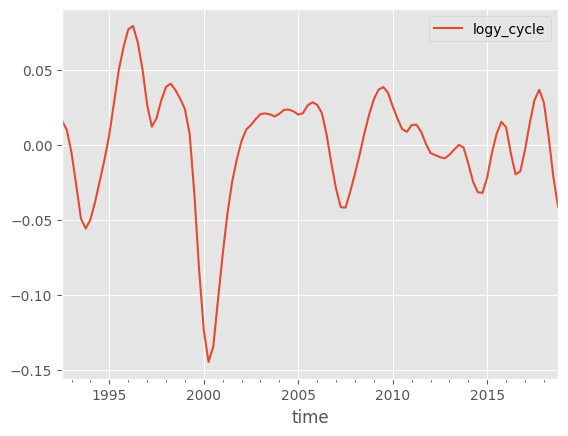

In [650]:
df.plot(x='time', y='logy_cycle')

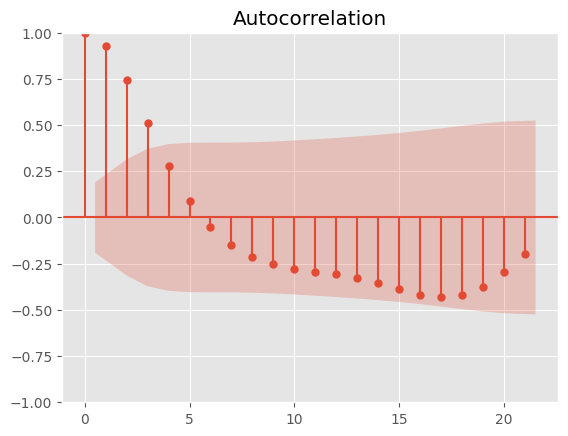

In [651]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['logy_cycle'])
plt.show()

In [652]:
df.to_csv('../data/cleaned.csv', index=False)